# Mapping individual satellite data for an area of interest (with optional movie)
1. Choose area of interest; determine latitude and longitude subset using Google maps. 
2. Select good swaths of data; days where you area of interest is not covered by clouds.
3. Load data in Jupyterlab as a xarray.Dataset.
4. Select a subset over your region of interest. 
5. Create a subplot where x is longitude, y is latitude, and the colormap is chlorophyll concentration.
6. 

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cmocean as cmo

In [2]:
modis = xr.open_dataset('https://oceandata.sci.gsfc.nasa.gov:443/opendap/MODISA/L3SMI/2021/275/A2021275.L3m_DAY_CHL_chl_ocx_4km.nc')

In [3]:
# subset to a sub-region in the Northwestern Atlantic
subset_modis = modis.where( (modis.lon>=-80)&(modis.lon<-70)& (modis.lat>=32)&(modis.lat<42), drop=True)

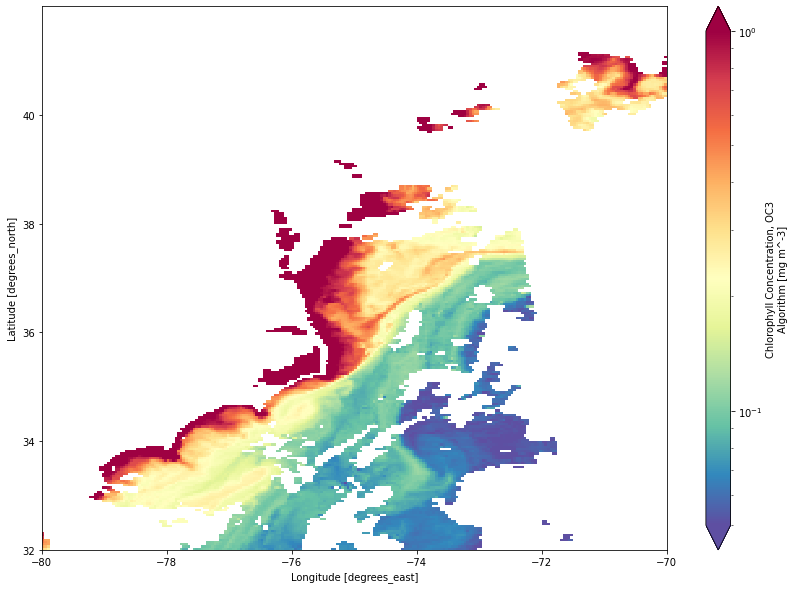

In [4]:
fig, ax = plt.subplots(figsize=(14,10))

subset_modis.chl_ocx.plot.pcolormesh(
    x='lon',y='lat', 
    norm=colors.LogNorm(vmin=0.05,vmax=1),
    cmap='Spectral_r'
)